In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('im.db')

In [3]:
q = """
SELECT mb.genres, mr.numvotes, mr.averagerating
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
ORDER BY numvotes DESC
LIMIT 10
;
"""
df_sql = pd.read_sql(q, conn)
df_sql

,genres,numvotes,averagerating
0,"Action,Adventure,Sci-Fi",1841066,8.8
1,"Action,Thriller",1387769,8.4
2,"Adventure,Drama,Sci-Fi",1299334,8.6
3,"Drama,Western",1211405,8.4
4,"Action,Adventure,Sci-Fi",1183655,8.1
5,"Biography,Crime,Drama",1035358,8.2
6,"Mystery,Thriller",1005960,8.1
7,"Action,Adventure,Comedy",948394,8.1
8,"Action,Adventure,Comedy",820847,8.0
9,"Action,Adventure,Sci-Fi",795227,7.2


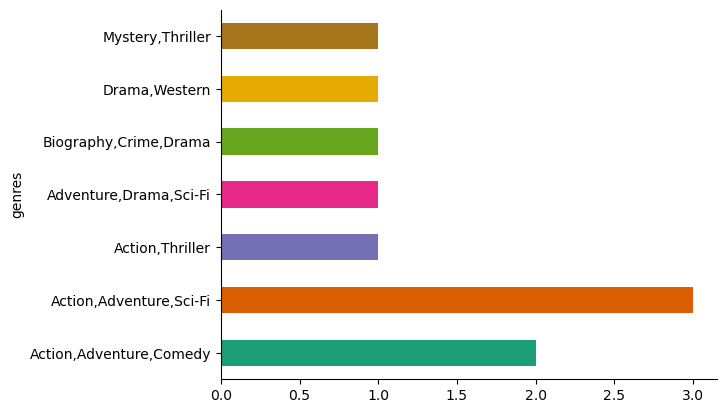

In [4]:
df_sql.groupby('genres').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
q = """
SELECT mb.genres, mb.runtime_minutes, ma.region
FROM movie_basics mb
JOIN movie_akas ma ON mb.movie_id = ma.movie_id
ORDER BY runtime_minutes DESC
LIMIT 10
;
"""
df_sql = pd.read_sql(q, conn)
df_sql

,genres,runtime_minutes,region
0,Documentary,51420.0,None
1,Documentary,51420.0,SE
2,Documentary,51420.0,SE
3,Documentary,51420.0,US
4,Documentary,14400.0,FI
5,Documentary,6017.0,IN
6,"Documentary,Drama",6000.0,IT
7,"Comedy,Drama,Mystery",5460.0,GB
8,"Drama,Western",4980.0,DE
9,"Comedy,Drama",4200.0,None


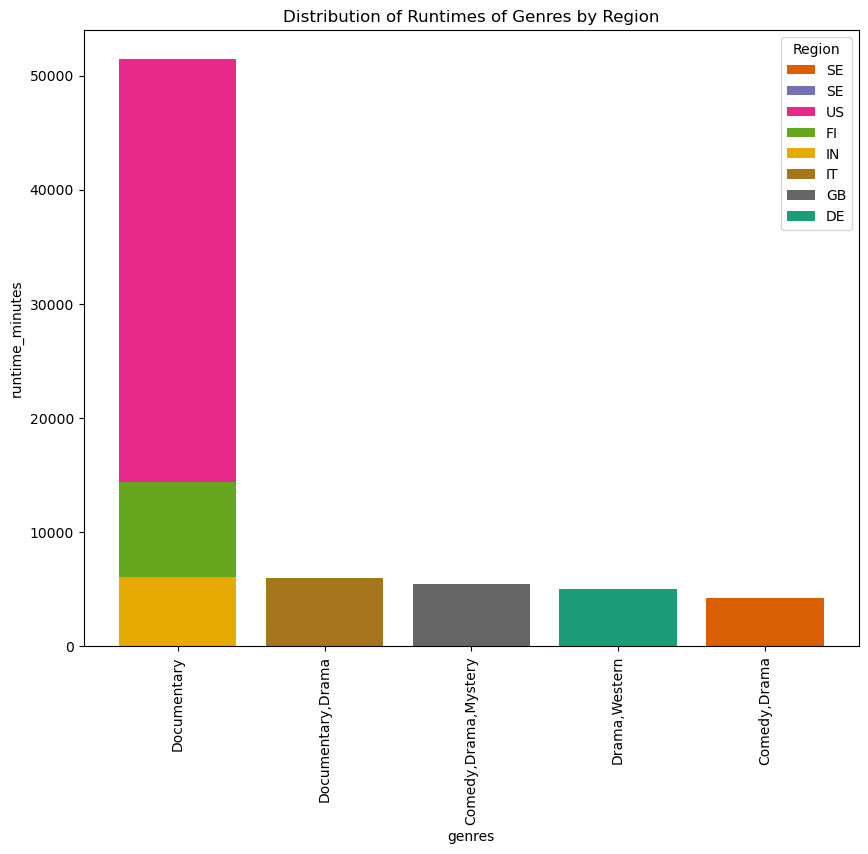

In [22]:
plt.figure(figsize=(10,8))
colors = sns.color_palette("Dark2")
bar_plot = plt.bar(df_sql['genres'], df_sql['runtime_minutes'], color=colors, label = df_sql['region'])

plt.xticks(rotation=90)
plt.xlabel('genres')
plt.ylabel('runtime_minutes')
plt.title('Distribution of Runtimes of Genres by Region')
plt.legend(title="Region")

plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
q = """SELECT * FROM movie_basics"""
df = pd.read_sql(q, conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [13]:
#most popular genres
q = """SELECT genres, COUNT(*) as genre_count
From movie_basics
GROUP BY genres
ORDER BY genre_count DESC
LIMIT 10"""
pd.read_sql(q, conn)

,genres,genre_count
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,None,5408
4,Horror,4372
5,"Comedy,Drama",3519
6,Thriller,3046
7,Action,2219
8,"Biography,Documentary",2115
9,"Drama,Romance",2079


In [14]:
#average runtime by genre
q = """SELECT genres, AVG(runtime_minutes) AS avg_runtime
FROM movie_basics
WHERE runtime_minutes IS NOT NULL
GROUP BY genres
ORDER BY avg_runtime DESC"""
pd.read_sql(q, conn)

,genres,avg_runtime
0,"Drama,Western",225.342105
1,"Biography,Mystery,Sci-Fi",220.000000
2,"History,Musical,Romance",174.000000
3,"Action,Musical,Romance",170.000000
4,"Musical,Romance,Thriller",165.000000
...,...,...
1036,"Animation,Documentary,Sci-Fi",10.000000
1037,"Drama,Horror,Short",7.000000
1038,"Documentary,Mystery,Romance",7.000000
1039,"Animation,Documentary,Horror",4.000000


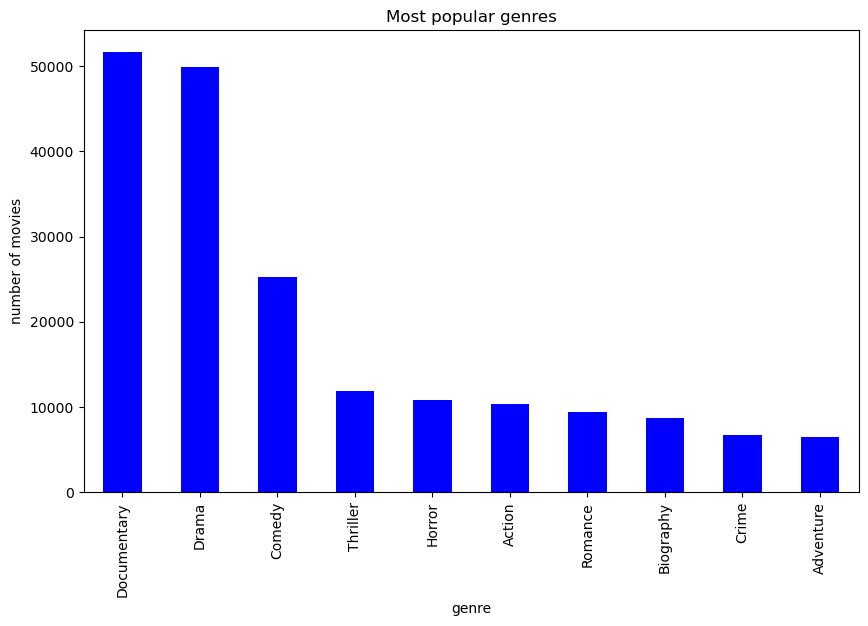

In [16]:
genres_split = df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
genres_counts = genres_split.value_counts().head(10)
genres_counts.plot(kind='bar', figsize=(10,6), color='blue')
plt.title("Most popular genres")
plt.xlabel("genre")
plt.ylabel("number of movies")
plt.show()